<h1>Impacto de la pandemia del COVID-19 en el empleo de las mujeres</h1>

<p><b>Objetivo:</b> Cómo impacto la pandemia en mujeres (situación de desocupación)</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Job Situation-Sex-Age Range-Quarter.csv") 

In [3]:
data

,Job Situation ID,Job Situation,Sex ID,Sex,Age Range ID,Age Range,Quarter ID,Quarter,Number of Records
0,1,Has a Job or a Business,1,Male,1,15 to 24 years,20191,2019-Q1,804
1,1,Has a Job or a Business,1,Male,1,15 to 24 years,20192,2019-Q2,859
2,1,Has a Job or a Business,1,Male,1,15 to 24 years,20193,2019-Q3,704
3,1,Has a Job or a Business,1,Male,1,15 to 24 years,20194,2019-Q4,608
4,1,Has a Job or a Business,1,Male,1,15 to 24 years,20201,2020-Q1,814
...,...,...,...,...,...,...,...,...,...
135,2,No,2,Female,5,55 to 64 years,20193,2019-Q3,11262
136,2,No,2,Female,5,55 to 64 years,20194,2019-Q4,11286
137,2,No,2,Female,5,55 to 64 years,20201,2020-Q1,11986
138,2,No,2,Female,5,55 to 64 years,20203,2020-Q3,9272


In [4]:
## Se eliminaron las columnas ['Job Situation ID', 'Sex ID', 'Age Range', 'Quarter']

In [5]:
data_filtered = data.drop(columns=['Job Situation ID', 'Sex ID', 'Age Range', 'Age Range ID', 'Quarter ID'])

In [6]:
## Se dividieron los datos de acuerdo al sexo

In [7]:
data_mujer = data_filtered[data_filtered['Sex'] == 'Female']
data_hombre = data_filtered[data_filtered['Sex'] == 'Male']

In [8]:
## Eliminar la columna 'Sex'

In [9]:
data_mujer = data_mujer.drop(columns=['Sex'])
data_hombre = data_hombre.drop(columns=['Sex'])

In [10]:
data_mujer = data_mujer.groupby(['Job Situation','Quarter']).sum()
data_hombre = data_hombre.groupby(['Job Situation','Quarter']).sum()

In [11]:
data_mujer = data_mujer.unstack()
data_hombre = data_hombre.unstack()

In [12]:
data_mujer

Number of Records                                  \
Quarter                           2019-Q1 2019-Q2 2019-Q3 2019-Q4 2020-Q1   
Job Situation                                                               
Has a Job or a Business              4386    4195    5078    2939    5042   
No                                  69681   68519   68077   67236   70115   

                                         
Quarter                 2020-Q3 2020-Q4  
Job Situation                            
Has a Job or a Business    6987    4558  
No                        53842   62456

In [13]:
data_hombre

Number of Records                                  \
Quarter                           2019-Q1 2019-Q2 2019-Q3 2019-Q4 2020-Q1   
Job Situation                                                               
Has a Job or a Business              5346    4995    5119    3948    5848   
No                                  25298   25287   24878   25070   26558   

                                         
Quarter                 2020-Q3 2020-Q4  
Job Situation                            
Has a Job or a Business    7470    5460  
No                        21641   24791

In [14]:
def get_index(data):
    index = []
    for i in range(0,len(data.columns)):
        index.append(data.columns[i][1])
    return index

In [15]:
index_hombre = get_index(data_hombre)
index_hombre

['2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q3', '2020-Q4']

In [16]:
index_mujer = get_index(data_mujer)
index_mujer

['2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q3', '2020-Q4']

In [17]:
## Al parecer faltan datos del trimestre 2020-Q2, sin embargo los datos de la descarga no arrojan datos 
## en dichos semestre

### Se extrajeron los datos de hombres no laborando y laborando

In [18]:
hom_no_laborando = data_hombre.iloc[0].to_list()
hom_no_laborando

[5346, 4995, 5119, 3948, 5848, 7470, 5460]

In [19]:
hom_laborando = data_hombre.iloc[1].to_list()
hom_laborando

[25298, 25287, 24878, 25070, 26558, 21641, 24791]

### Se extrajeron los datos de mujeres no laborando y laborando

In [20]:
muj_no_laborando = data_mujer.iloc[0].to_list()
muj_no_laborando

[4386, 4195, 5078, 2939, 5042, 6987, 4558]

In [21]:
muj_laborando = data_mujer.iloc[1].to_list()
muj_laborando

[69681, 68519, 68077, 67236, 70115, 53842, 62456]

### Visualización de datos
### Gráfica de barras

### Mujeres

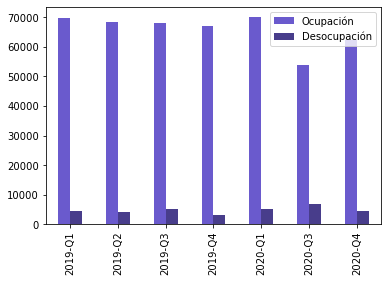

In [22]:
muj_laborando = data_mujer.iloc[1].to_list()
muj_no_laborando = data_mujer.iloc[0].to_list()

index = index_mujer

df = pd.DataFrame({'Ocupación': muj_laborando,
                'Desocupación': muj_no_laborando}, index=index)

ax = df.plot.bar(color=['slateblue', 'darkslateblue'])
plt.savefig('Ocup_mujeres.png', dpi=300)
plt.show()

### Hombres

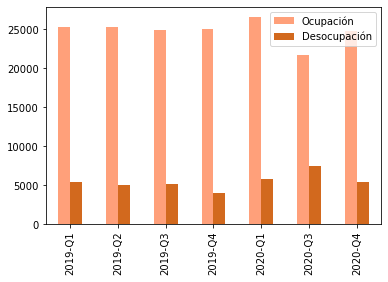

In [23]:
hom_laborando = data_hombre.iloc[1].to_list()
hom_no_laborando = data_hombre.iloc[0].to_list()

index = index_hombre

df = pd.DataFrame({'Ocupación': hom_laborando,
                'Desocupación': hom_no_laborando}, index=index)
ax = df.plot.bar(color=['lightsalmon', 'chocolate'])
plt.savefig('Ocup_hombres.png', dpi=300)
plt.show()